In [39]:
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt

In [40]:
data =load_iris(return_X_y=False)


In [41]:
X = data.data
y = data.target

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42) 



In [43]:
from sklearn.decomposition import PCA
miPCA = PCA(n_components=2)
X_train_PCA = miPCA.fit_transform(X_train)
X_test_PCA = miPCA.transform(X_test)


In [44]:

from sklearn.svm import SVC

modelo = SVC()


In [45]:
#Búsqueda por rejilla
from sklearn.model_selection import GridSearchCV

rejilla = {'C':[0.1,1,10,100], 'kernel':['linear','rbf','sigmoid'],'gamma':[0.01,0.1,0.2,0.3],'degree':[2,3,4],'coef0':[0.1,0.5,1.0]}

modeloGridSearchCrossValidation = GridSearchCV(estimator=modelo,param_grid=rejilla,scoring='accuracy',cv=5)

modeloGridSearchCrossValidation.fit(X_train_PCA,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.1, 0.5, 1.0],
                         'degree': [2, 3, 4], 'gamma': [0.01, 0.1, 0.2, 0.3],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [46]:
x1min, x1max = -3.5, 4
x2min, x2max = -2.0, 2.0

xx1 = np.linspace(x1min, x1max, 100)
xx2 = np.linspace(x2min, x2max, 100)

xx1mesh,xx2mesh = np.meshgrid(xx1,xx2)


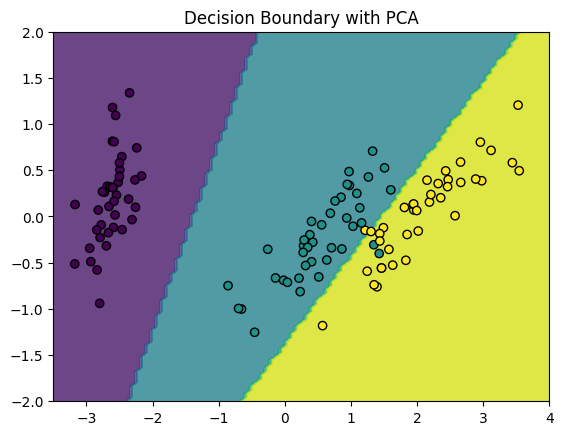

In [52]:
Z = modeloGridSearchCrossValidation.predict(np.c_[xx1mesh.ravel(), xx2mesh.ravel()])
Z = Z.reshape(xx1mesh.shape)

plt.contourf(xx1mesh, xx2mesh, Z, alpha=0.8)
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
plt.title('Decision Boundary with PCA')
plt.show()

In [32]:
#Best score:
modeloGridSearchCrossValidation.best_score_

np.float64(0.9666666666666668)

In [33]:
mejorModelo = modeloGridSearchCrossValidation.best_estimator_
mejorModelo.fit(X_train,y_train)

SVC(C=100, coef0=0.1, degree=2, gamma=0.01, kernel='linear')

In [34]:
y_pred = mejorModelo.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred,y_test)

1.0